In [2]:
import matplotlib.pyplot as plt
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
warnings.filterwarnings("ignore")

### Constants

In [17]:
LOSSES_PATH = '../data/losses.csv'
METRICS_PATH = '../data/metrics.csv'

In [23]:
losses = pd.read_csv(LOSSES_PATH)[['epoch', 'looses', 'mean', 'std']]
metrics = pd.read_csv(METRICS_PATH)[['epoch', 'class_accuracy', 'noobj_accuracy', 'obj_accuracy', 'map']]

### Analysis

#### Loss metrics

For this analysis, we will use the following metrics:
- [Binary Cross Entropy](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a): used for not object loss.
- [Cross Entropy](https://towardsdatascience.com/an-intuitive-guide-how-entropy-connects-to-cross-entropy-78b0713494a9): used for class loss.
- [Mean Squared Error](https://medium.com/nothingaholic/understanding-the-mean-squared-error-df41e2c87958#:~:text=MSE%20is%20the%20average%20of,values%20and%20the%20predicted%20ones.&text=Then%20we%20take%20the%20average,data%20are%20of%20the%20population.): used for box loss (intersection over union) and coordinate loss (distance between two points)

In addition based on [YOLOv3 Loss calculation](https://towardsdatascience.com/calculating-loss-of-yolo-v3-layer-8878bfaaf1ff), we defined the following factors that signify how much to pay for each respective part of the loss:
- Class loss: 1
- No object loss: 10
- Object loss: 1
- Box loss (intersection and coordinates): 10

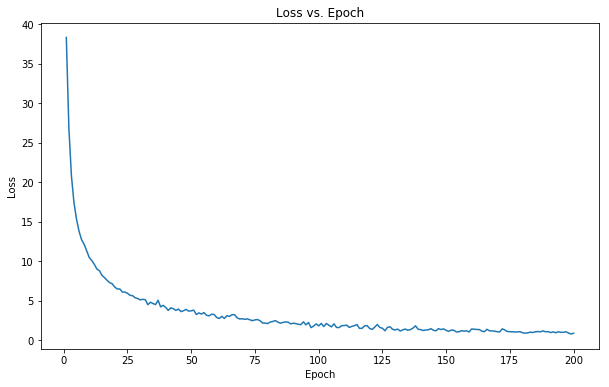

In [34]:
plt.figure(figsize=(10, 6))
loss_plot = sns.lineplot(x='epoch', y='mean', data=losses)
plt.title('Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
loss_plot.figure.savefig('../img/loss_plot.png', dpi=150)

In [25]:
metrics.head()

,epoch,class_accuracy,noobj_accuracy,obj_accuracy,map
0,3,"tensor(21.5889, device='cuda:0')","tensor(99.8314, device='cuda:0')","tensor(0.6908, device='cuda:0')",0.199696
1,6,"tensor(25.8779, device='cuda:0')","tensor(99.9962, device='cuda:0')","tensor(0.3022, device='cuda:0')",0.021215
2,9,"tensor(29.7640, device='cuda:0')","tensor(99.9964, device='cuda:0')","tensor(0.9643, device='cuda:0')",0.027495
3,12,"tensor(35.4634, device='cuda:0')","tensor(99.9820, device='cuda:0')","tensor(5.3253, device='cuda:0')",0.087721
4,15,"tensor(41.9833, device='cuda:0')","tensor(99.9678, device='cuda:0')","tensor(14.2631, device='cuda:0')",0.195057
